In [47]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [6]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
#null values
df.isna().sum().sort_values(ascending=False).head(5)

Parental_Education_Level    90
Teacher_Quality             78
Distance_from_Home          67
Hours_Studied                0
Attendance                   0
dtype: int64

In [8]:
#imputing missing values
print(df['Parental_Education_Level'].value_counts(),"\n")
print(df['Teacher_Quality'].value_counts(),"\n")
print(df['Distance_from_Home'].value_counts(),"\n")

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64 

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64 

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64 



In [9]:
#filling with mode of each variable
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [10]:
df.isna().sum().sort_values(ascending=False).head(5)

Hours_Studied               0
Attendance                  0
Gender                      0
Distance_from_Home          0
Parental_Education_Level    0
dtype: int64

### dividing features into categorical and numerical

In [11]:
cat_cols = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']
num_cols = ['Hours_Studied', 'Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']
target_col = ['Exam_Score']

### EDA

In [12]:
def plot_box(df):
    numerical_cols = ['Hours_Studied', 'Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(15,20),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='Gender',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

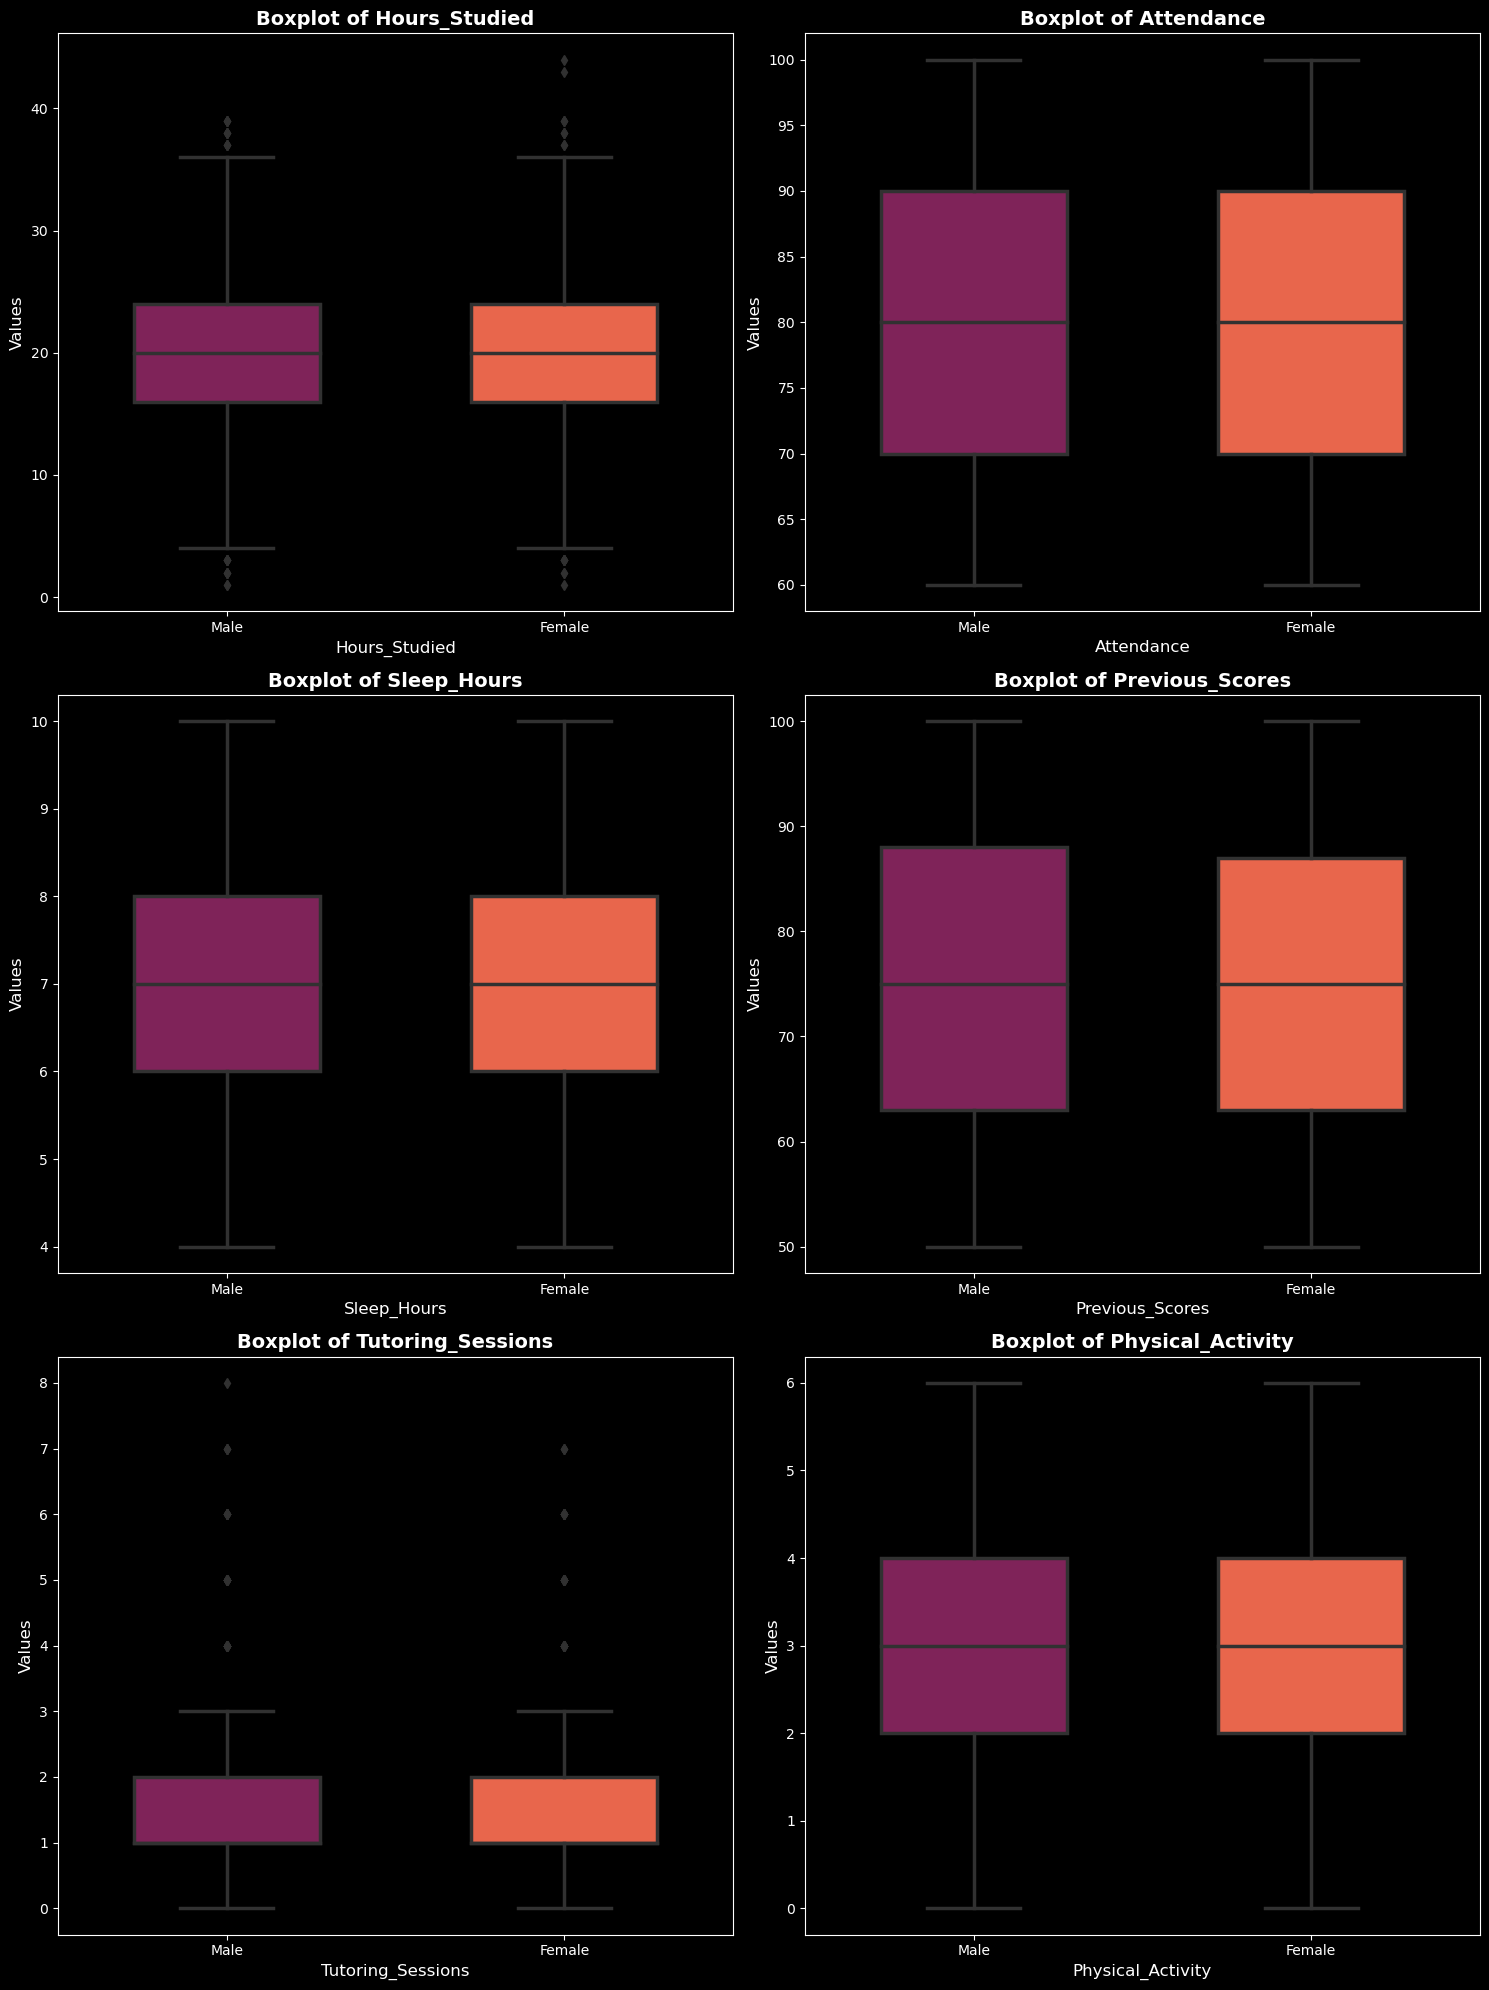

In [13]:
plot_box(df)

In [14]:
def plot_hist(df):
    numerical_cols = ['Hours_Studied', 'Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(15,20),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='winter_r',ax=ax,kde=True,bins=75,hue='Gender')
        ax.set_title(f'Histplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

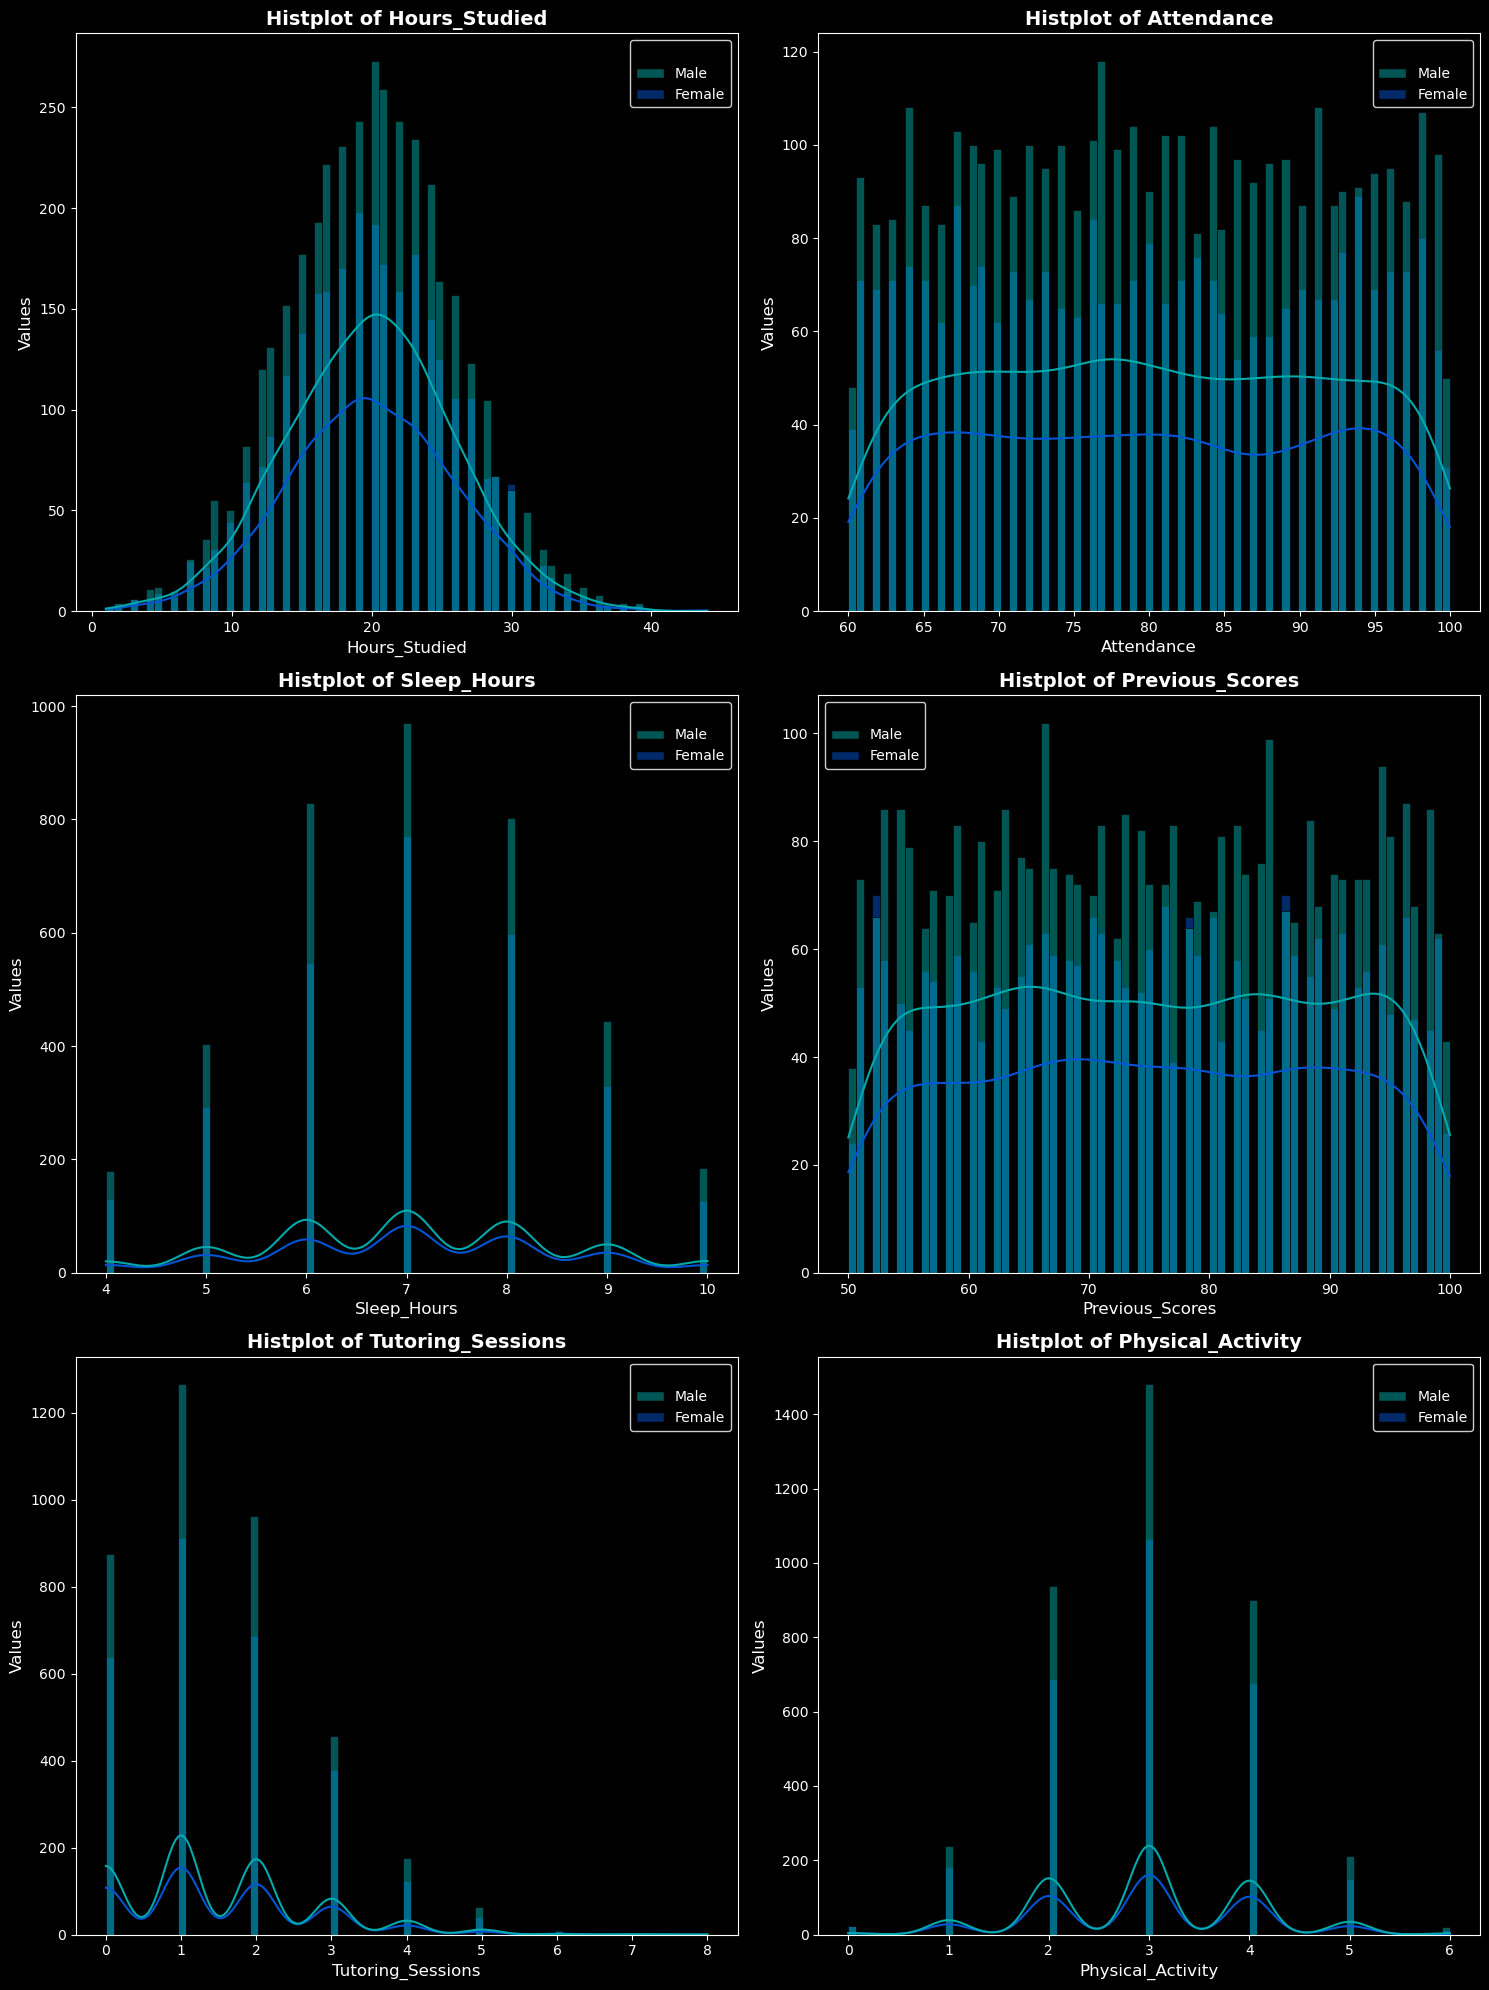

In [15]:
plot_hist(df)

In [16]:
def plot_count(df):
    cat_cols = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home']
    num_plots = len(cat_cols)
    nrows = (num_plots+1)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(18,25),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(cat_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.countplot(x=df[column],palette='viridis',ax=ax)
        ax.set_title(f'Distplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

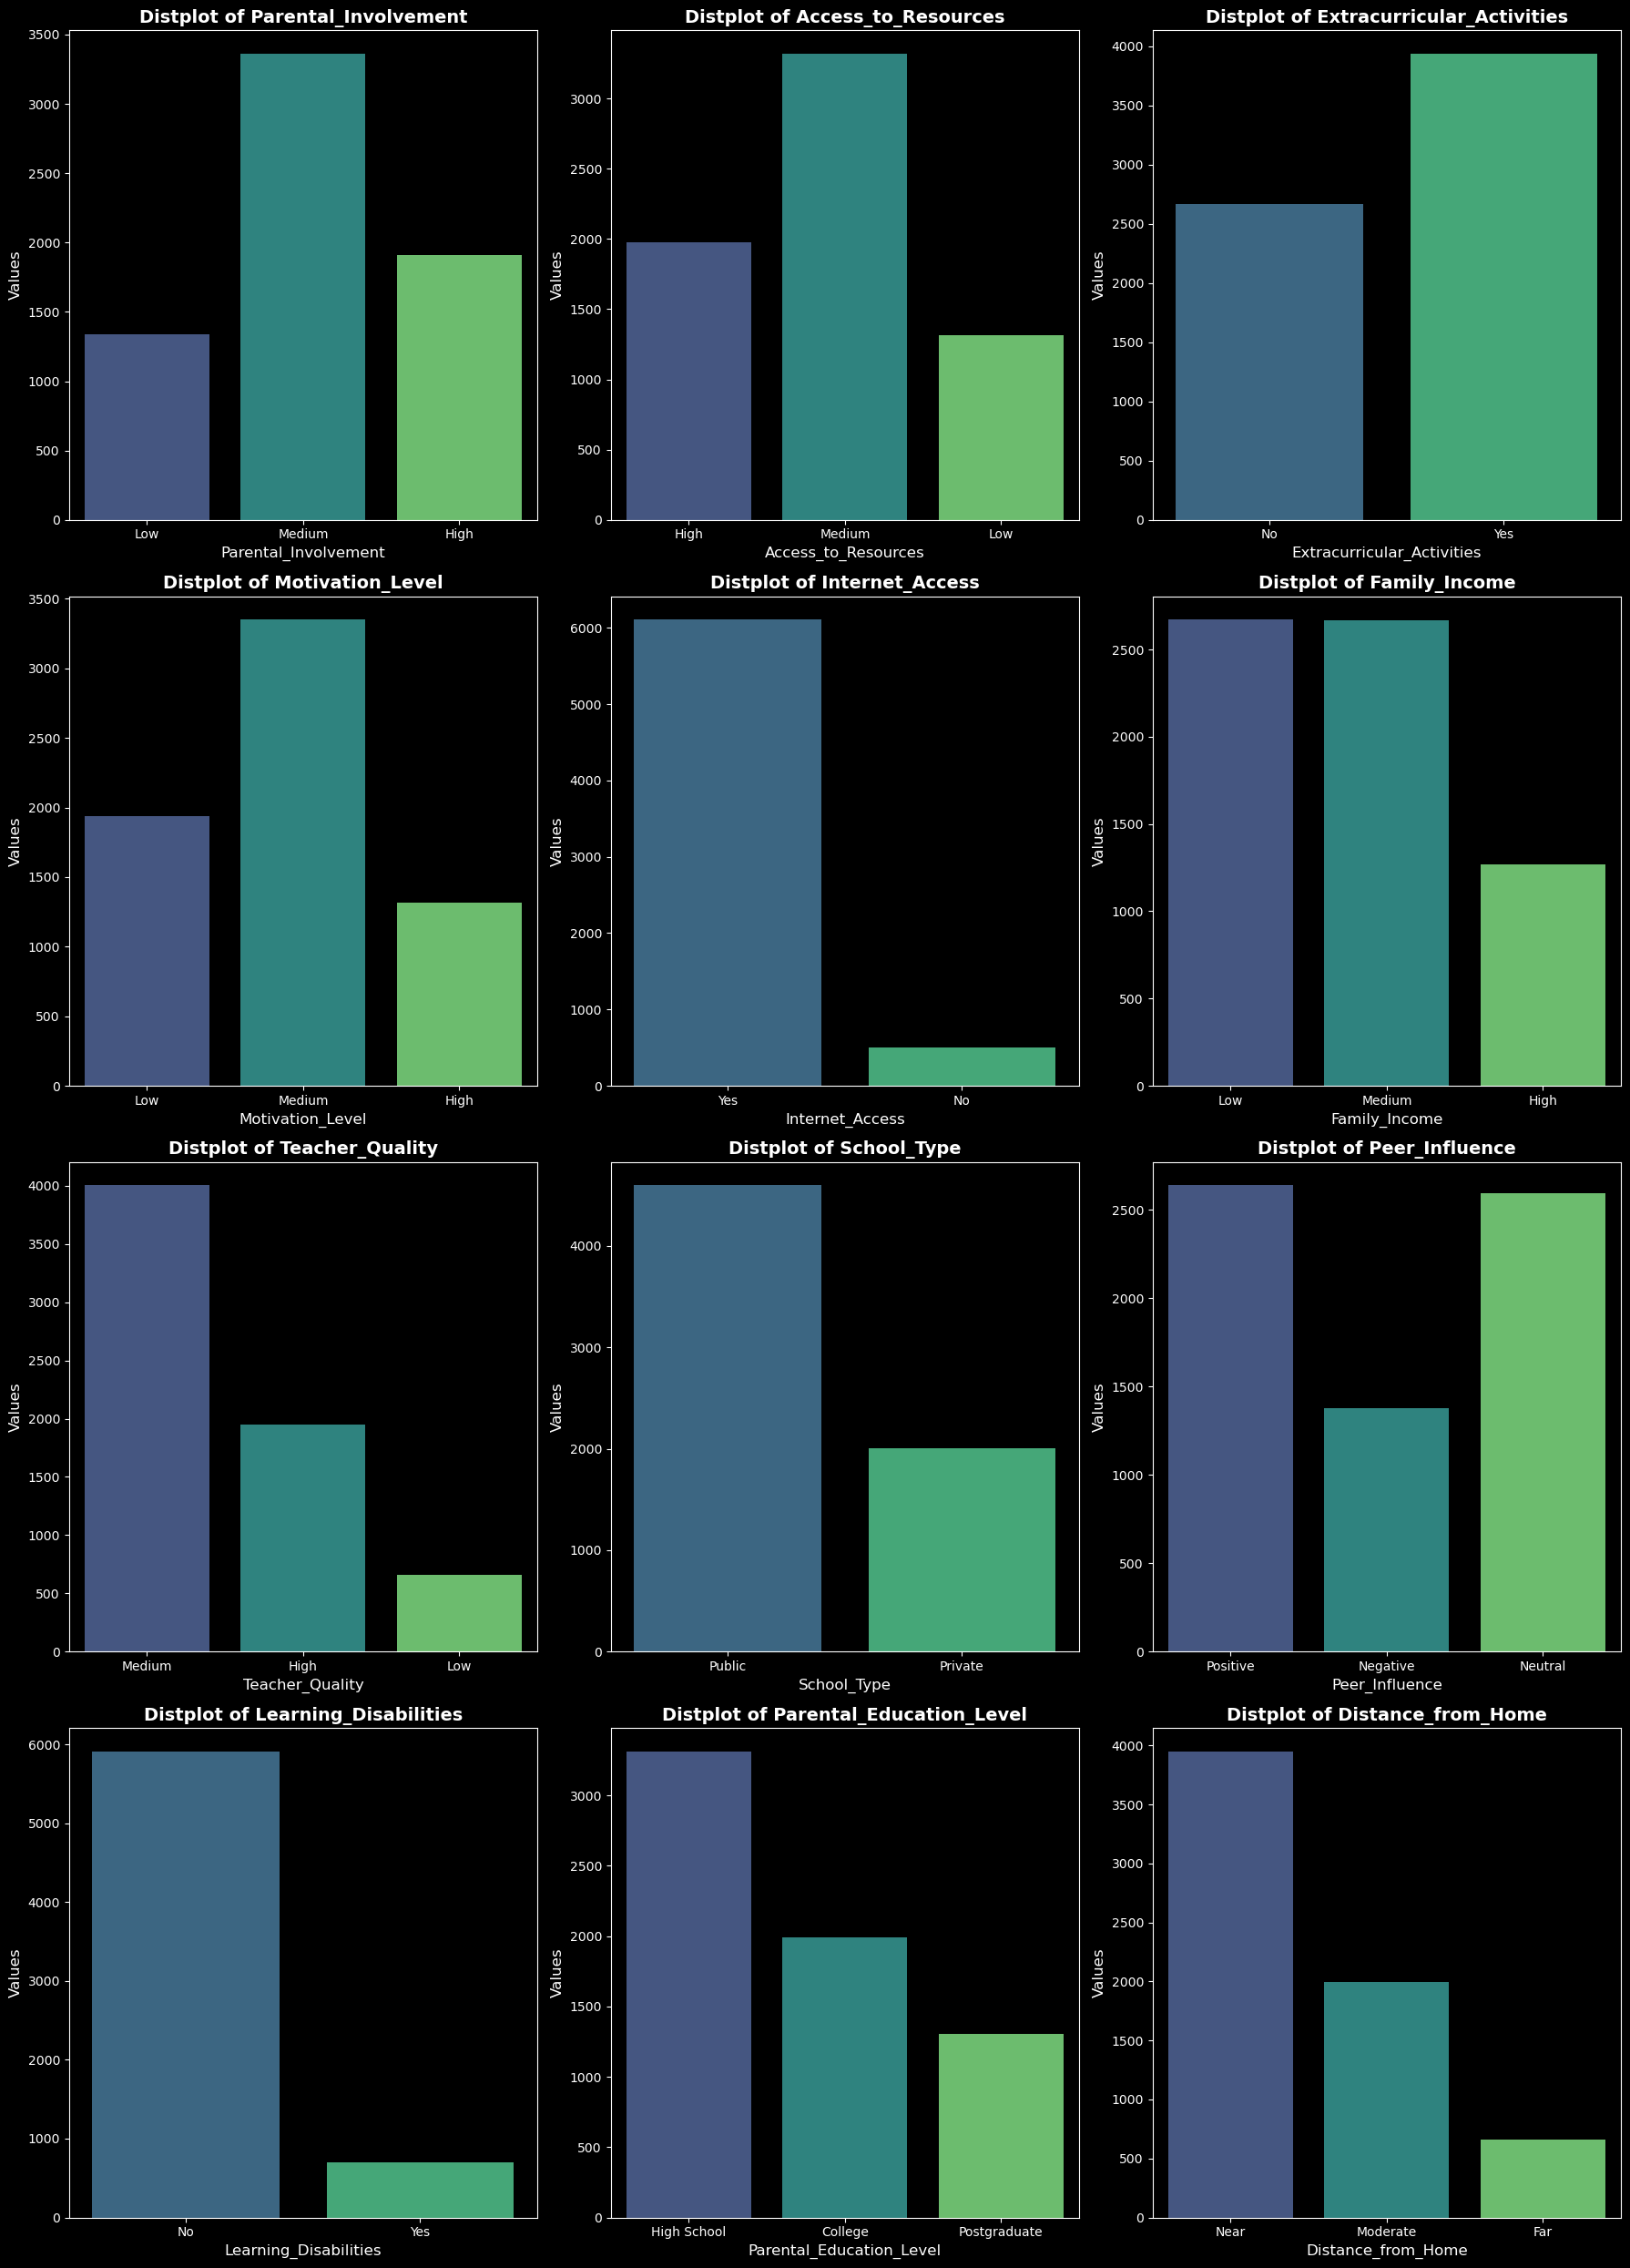

In [17]:
plot_count(df)

In [18]:
def plot_scatter(df):
    numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
    num_plots = len(numerical_cols)
    nrows = (num_plots + 1) // 2
    ncols = 2
    fig, axes = plt.subplots(figsize=(15, 20), nrows=nrows, ncols=ncols, facecolor='black')
    
    for i, column in enumerate(numerical_cols):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        ax.set_facecolor('black')
        sns.scatterplot(x=column, y='Exam_Score', data=df, hue='Gender', palette='winter_r', ax=ax)
        ax.set_title(f'Scatterplot of {column} vs Exam_Score', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel(f'Exam_Score', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    
    plt.tight_layout()
    plt.show()

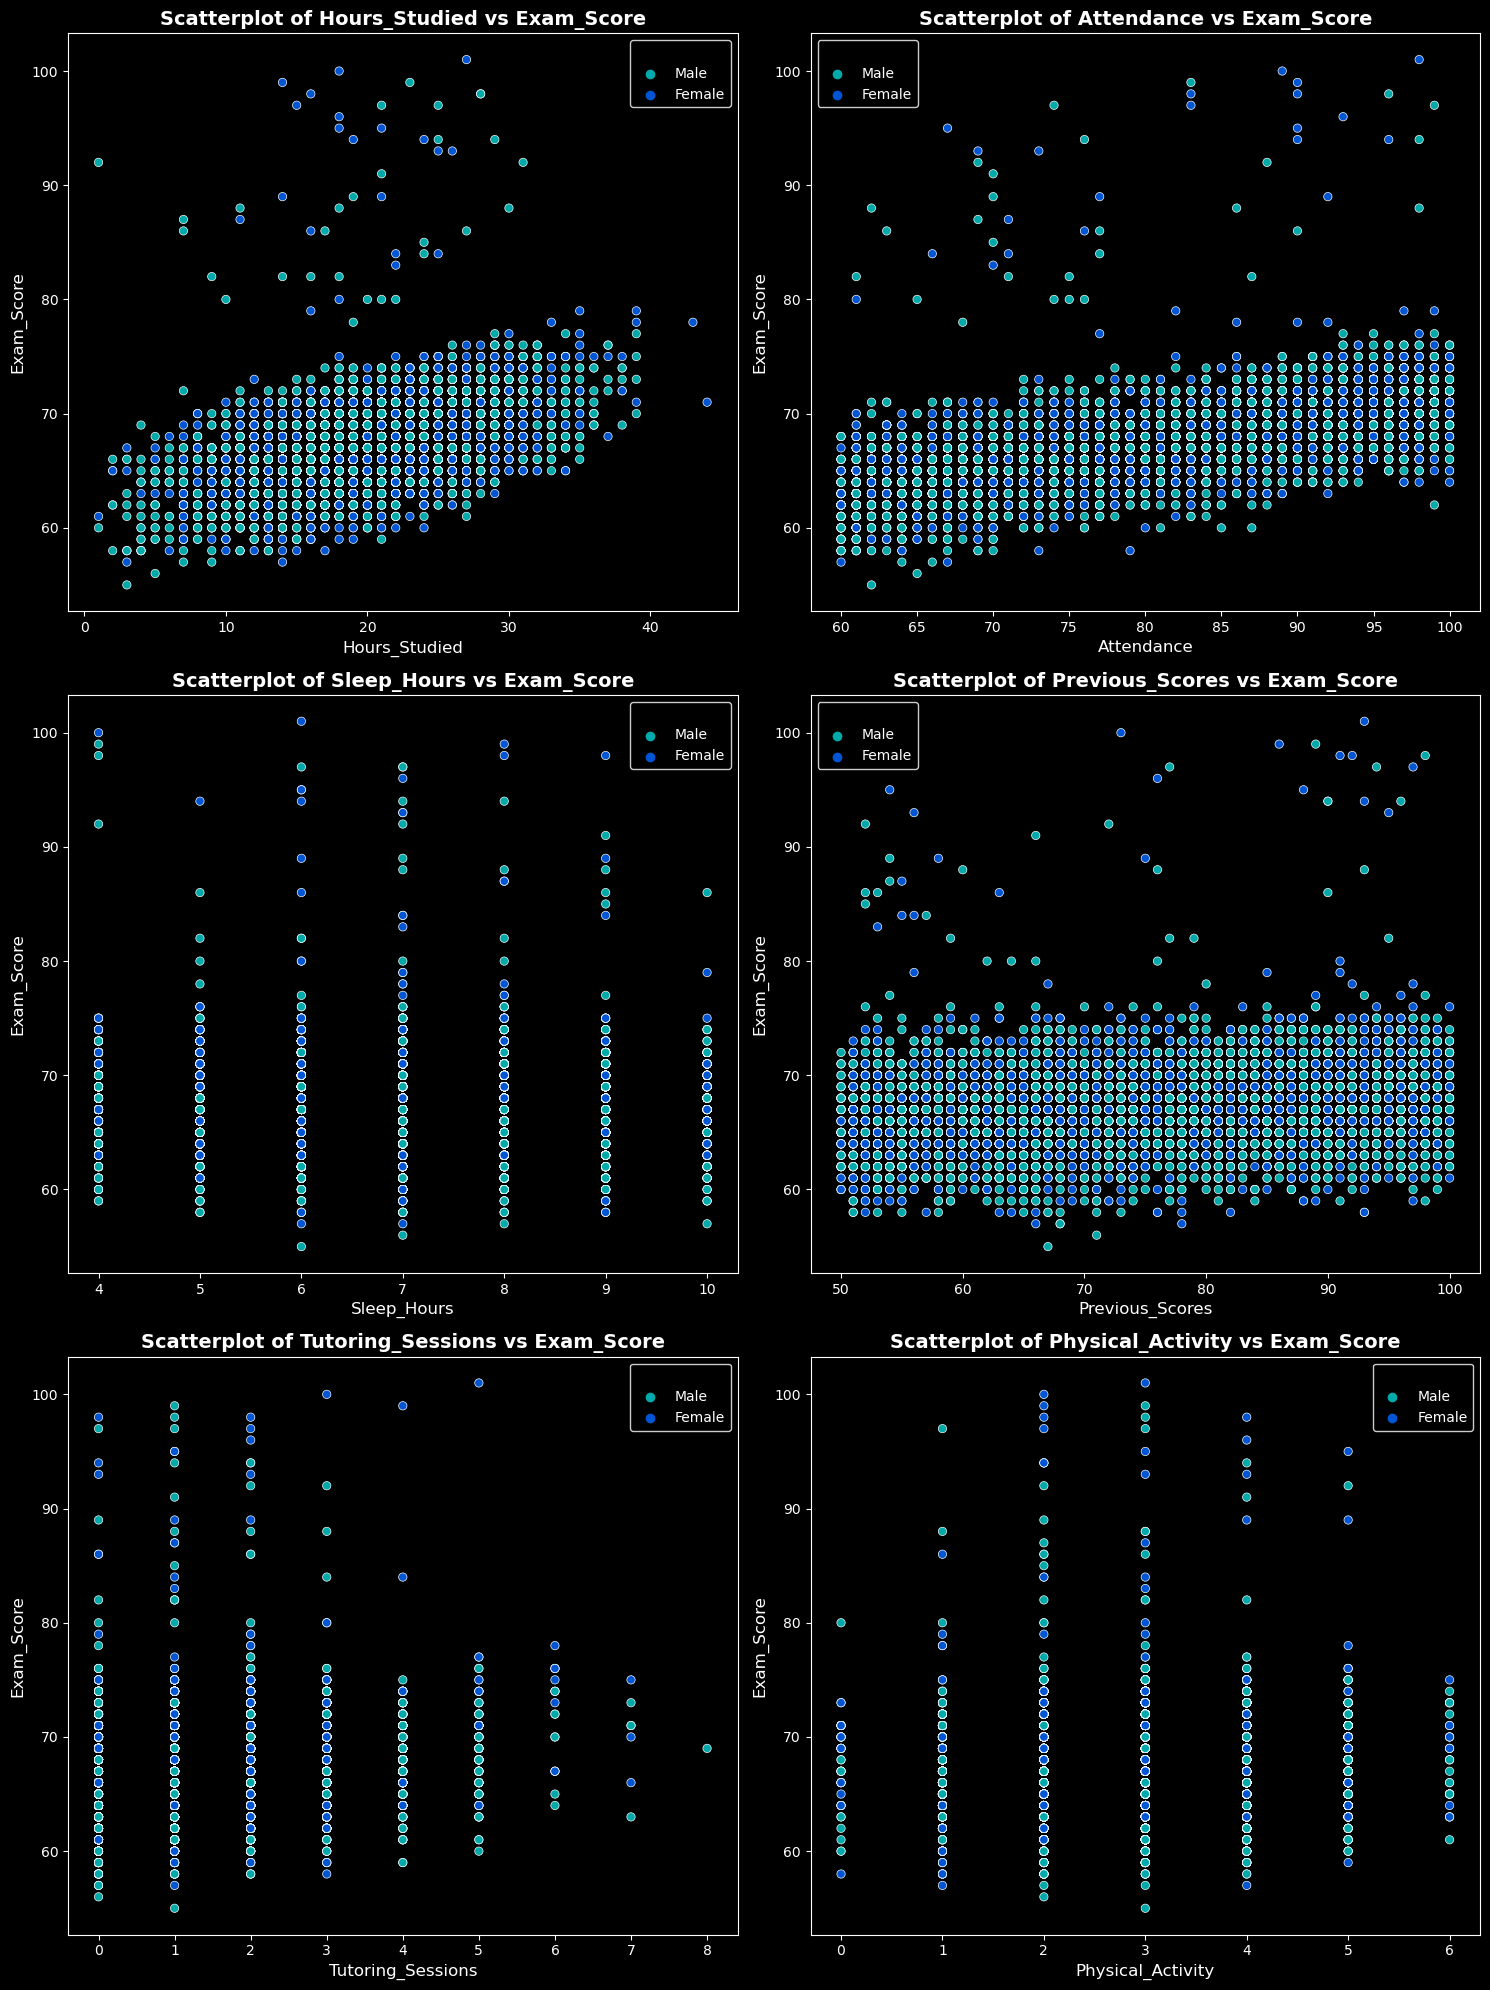

In [19]:
plot_scatter(df)

### violin plot for target column

In [20]:
def plot_violin(df):
    numerical_cols = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(40,30),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.violinplot(y='Exam_Score',x=column,data=df,palette='viridis', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Violin Plot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

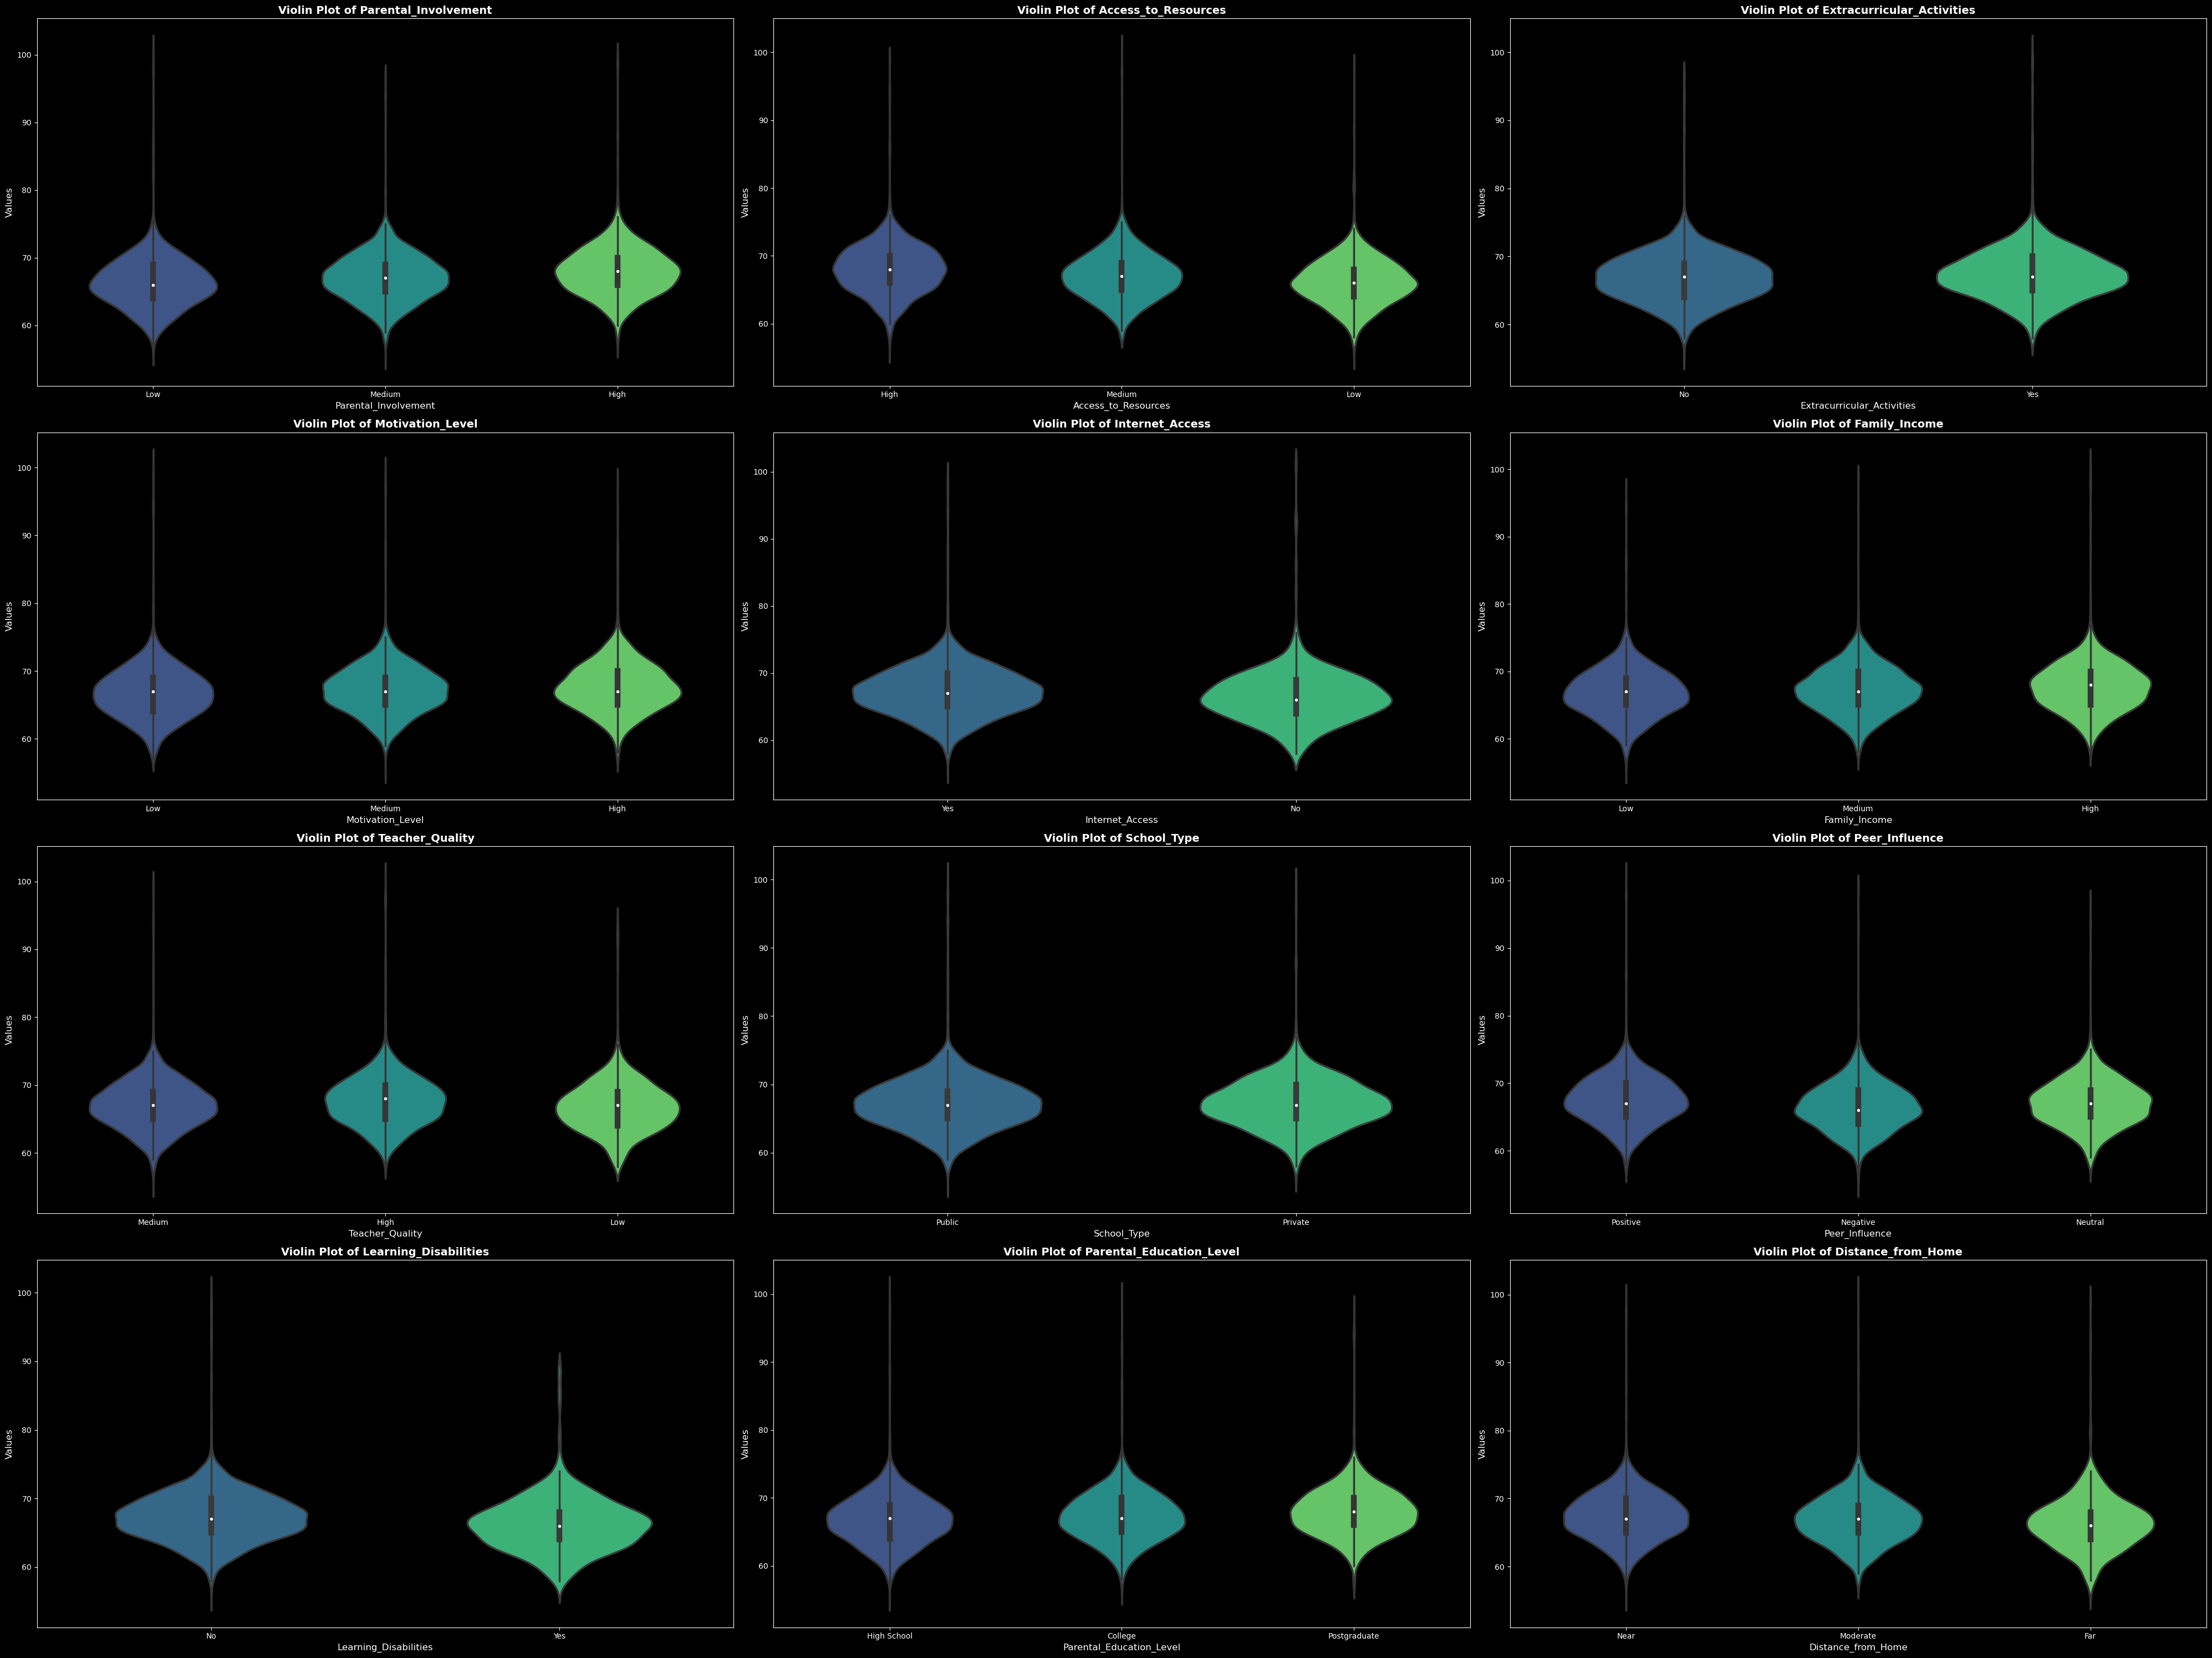

In [21]:
plot_violin(df)

<Axes: >

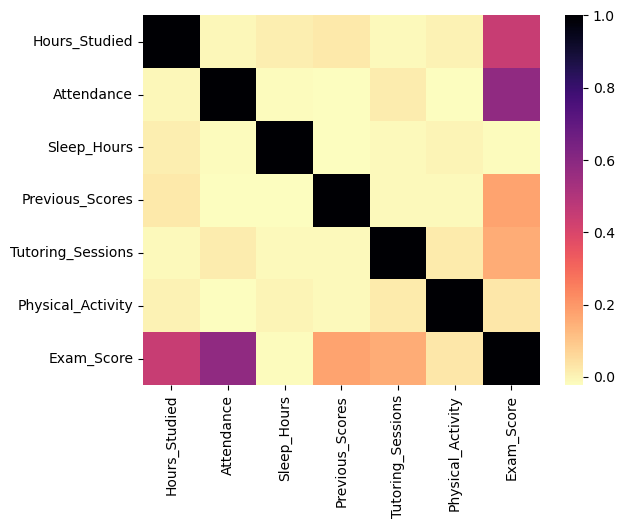

In [22]:
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='magma_r')

### Coverting categorical variables

In [23]:
df[cat_cols].head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


In [25]:
#creating a map for low,medim,high
cat_map_lmh = {'Low':0,'Medium':1,'High':2}
cols_to_map = ['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality']
df[cols_to_map] = df[cols_to_map].replace(cat_map_lmh)

In [31]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].replace({'High School':1,'College':2,'Postgraduate':3})
df['Distance_from_Home'] = df['Distance_from_Home'].replace({'Near':1,'Moderate':2,'Far':3})

In [32]:
df[cat_cols].head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0,2,No,0,Yes,0,1,Public,Positive,No,1,1,Male
1,0,1,No,0,Yes,1,1,Public,Negative,No,2,2,Female
2,1,1,Yes,1,Yes,1,1,Public,Neutral,No,3,1,Male
3,0,1,Yes,1,Yes,1,1,Public,Negative,No,1,2,Male
4,1,1,Yes,1,Yes,1,2,Public,Neutral,No,2,1,Female


### Rest for one hot encoding

In [33]:
one_hot_cols = ['Extracurricular_Activities','Internet_Access','School_Type','Peer_Influence','Learning_Disabilities','Gender']
df = pd.get_dummies(df,columns=one_hot_cols,drop_first=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6607 non-null   int64
 1   Attendance                      6607 non-null   int64
 2   Parental_Involvement            6607 non-null   int64
 3   Access_to_Resources             6607 non-null   int64
 4   Sleep_Hours                     6607 non-null   int64
 5   Previous_Scores                 6607 non-null   int64
 6   Motivation_Level                6607 non-null   int64
 7   Tutoring_Sessions               6607 non-null   int64
 8   Family_Income                   6607 non-null   int64
 9   Teacher_Quality                 6607 non-null   int64
 10  Physical_Activity               6607 non-null   int64
 11  Parental_Education_Level        6607 non-null   int64
 12  Distance_from_Home              6607 non-null   int64
 13  Exa

In [37]:
#max value for any variable is less than 256, thus we can convert to int8 without losing any info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Parental_Involvement,6607.0,1.086423,0.695521,0.0,1.0,1.0,2.0,2.0
Access_to_Resources,6607.0,1.100197,0.698347,0.0,1.0,1.0,2.0,2.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Motivation_Level,6607.0,0.906463,0.695798,0.0,0.0,1.0,1.0,2.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Family_Income,6607.0,0.787649,0.742617,0.0,0.0,1.0,1.0,2.0
Teacher_Quality,6607.0,1.195247,0.596707,0.0,1.0,1.0,2.0,2.0


In [38]:
for col in list(df.columns):
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int8')

In [41]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,0,2,7,73,0,0,0,1,...,1,1,67,False,True,True,False,True,False,True
1,19,64,0,1,8,59,0,2,1,1,...,2,2,61,False,True,True,False,False,False,False
2,24,98,1,1,7,91,1,2,1,1,...,3,1,74,True,True,True,True,False,False,True
3,29,89,0,1,8,98,1,1,1,1,...,1,2,71,True,True,True,False,False,False,True
4,19,92,1,1,6,65,1,3,1,2,...,2,1,70,True,True,True,True,False,False,False


### Splitting into train and test

In [40]:
X = df.drop('Exam_Score',axis=1)
y = df['Exam_Score']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

In [53]:
def train_model(model, name, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))
    metrics = ['RMSE', 'MAE', 'R2 Score', 'CV R2 Score']
    values = [rmse, mae, r2, cv_r2]
    data = {'Metric': metrics, 'Value': values}
    plt.figure(figsize=(4, 4))
    sns.barplot(x='Metric', y='Value', data=data, palette='viridis')
    plt.title(f'Regression Metrics for {name}')
    plt.ylabel('Score')
    for i, v in enumerate(values):
        plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    
    plt.show()
    print(f'\nMetrics for {name}:')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print(f'Cross-Validated R2 Score: {cv_r2:.4f}')
    
    return model, {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'CV_R2': cv_r2}

### Dtree

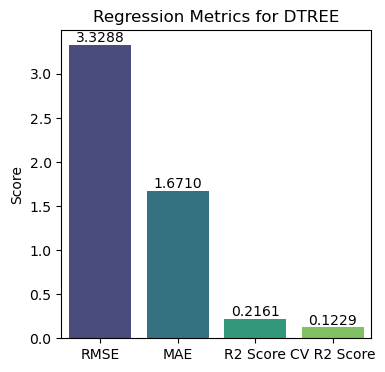


Metrics for DTREE:
Root Mean Squared Error: 3.3288
Mean Absolute Error: 1.6710
R2 Score: 0.2161
Cross-Validated R2 Score: 0.1229


(DecisionTreeRegressor(),
 {'RMSE': 3.328804285741133,
  'MAE': 1.6709531013615733,
  'R2': 0.21606783453774425,
  'CV_R2': 0.12292133024234972})

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
train_model(dtree,"DTREE")

### RandomForest

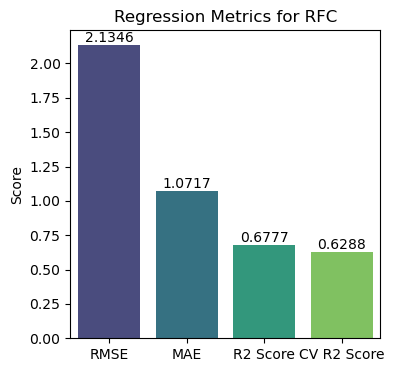


Metrics for RFC:
Root Mean Squared Error: 2.1346
Mean Absolute Error: 1.0717
R2 Score: 0.6777
Cross-Validated R2 Score: 0.6288


(RandomForestRegressor(),
 {'RMSE': 2.1345765434078894,
  'MAE': 1.0716717095310138,
  'R2': 0.6776516690414853,
  'CV_R2': 0.6287563509557836})

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
train_model(rfc,"RFC")

### SVM

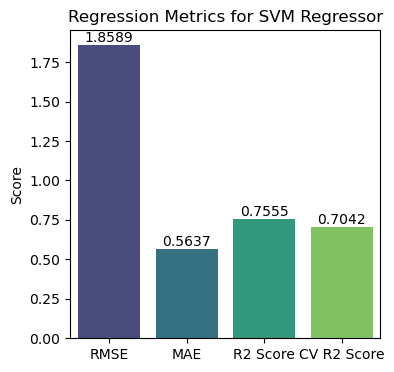


Metrics for SVM Regressor:
Root Mean Squared Error: 1.8589
Mean Absolute Error: 0.5637
R2 Score: 0.7555
Cross-Validated R2 Score: 0.7042


(SVR(),
 {'RMSE': 1.8589302994779795,
  'MAE': 0.5637229933380159,
  'R2': 0.7555285362063487,
  'CV_R2': 0.704225342310738})

In [57]:
from sklearn.svm import SVR
svm = SVR()
train_model(svm,"SVM Regressor")

### Linear Regression

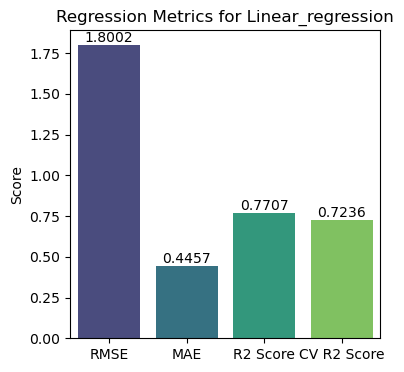


Metrics for Linear_regression:
Root Mean Squared Error: 1.8002
Mean Absolute Error: 0.4457
R2 Score: 0.7707
Cross-Validated R2 Score: 0.7236


(LinearRegression(),
 {'RMSE': 1.8002032879431904,
  'MAE': 0.44568669602070354,
  'R2': 0.7707311452347382,
  'CV_R2': 0.7236306398178545})

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train_model(lr,"Linear_regression")

### Ridge Lasso and elastinet (advanced regression models)

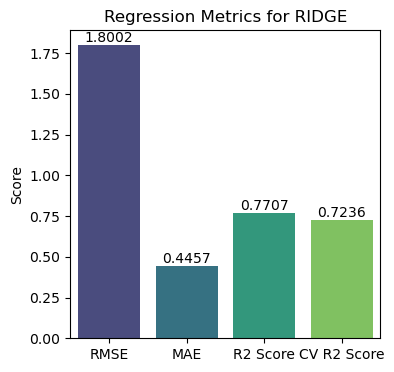


Metrics for RIDGE:
Root Mean Squared Error: 1.8002
Mean Absolute Error: 0.4457
R2 Score: 0.7707
Cross-Validated R2 Score: 0.7236


(Ridge(),
 {'RMSE': 1.800191680836248,
  'MAE': 0.4456900812729572,
  'R2': 0.7707341017225466,
  'CV_R2': 0.7236316422459652})

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()
train_model(ridge,"RIDGE")

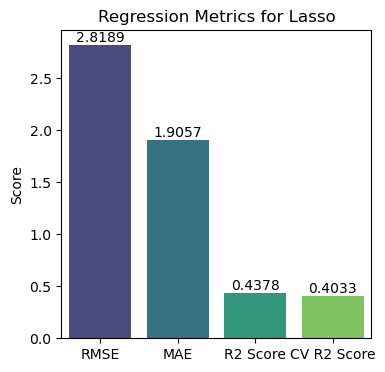


Metrics for Lasso:
Root Mean Squared Error: 2.8189
Mean Absolute Error: 1.9057
R2 Score: 0.4378
Cross-Validated R2 Score: 0.4033


(Lasso(),
 {'RMSE': 2.8189129432095084,
  'MAE': 1.90567707901411,
  'R2': 0.43783307821440265,
  'CV_R2': 0.4032609033369174})

In [60]:
from sklearn.linear_model import Lasso
lasso = Lasso()
train_model(lasso,"Lasso")

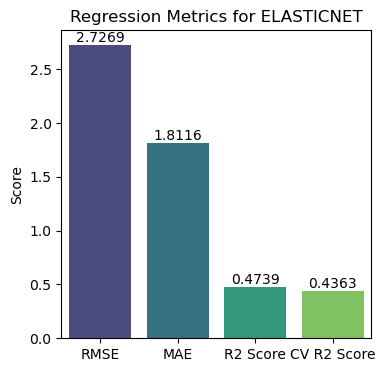


Metrics for ELASTICNET:
Root Mean Squared Error: 2.7269
Mean Absolute Error: 1.8116
R2 Score: 0.4739
Cross-Validated R2 Score: 0.4363


(ElasticNet(),
 {'RMSE': 2.7268878949216715,
  'MAE': 1.8116024682428533,
  'R2': 0.4739384884198743,
  'CV_R2': 0.43632225583652273})

In [61]:
from sklearn.linear_model import ElasticNet
el_net = ElasticNet()
train_model(el_net,"ELASTICNET")

### Models Used - dtree,rfc,svm,linear,ridge,lasso,elasticnet
### best performing -->Ridge 